<a href="https://colab.research.google.com/github/Irtisam99/CVPR/blob/main/MID/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])

Y = np.array([
    [1,0,0],  # class 0
    [0,1,0],  # class 1
    [0,0,1],  # class 2
    [1,0,0]   # class 0
])



In [22]:
class NeuralNetwork2Hidden:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 8
        hiddenLayer2Neurons = 5
        outLayerNeurons = 3

        self.learning_rate = 0.2

        self.W_IH1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H2O = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        self.hidden1_output = self.sigmoid(np.dot(X, self.W_IH1))
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.W_H1H2))
        self.output = self.sigmoid(np.dot(self.hidden2_output, self.W_H2O))

        return self.output

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_H2O.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H2O += self.hidden2_output.T.dot(output_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_IH1 += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)




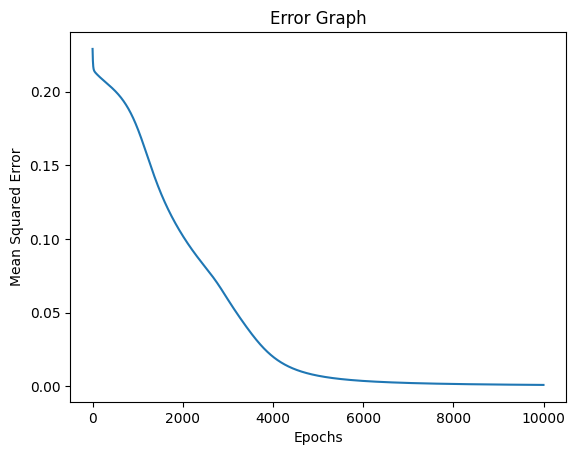

In [23]:

NN = NeuralNetwork2Hidden()


err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


plt.plot(err)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Error Graph")
plt.show()


In [24]:

np.set_printoptions(precision=4, suppress=True)
print(NN.feedForward([0,0]))
print(NN.feedForward([0,1]))
print(NN.feedForward([1,0]))
print(NN.feedForward([1,1]))

[0.968  0.018  0.0164]
[0.0447 0.9764 0.0001]
[0.0515 0.0024 0.9676]
[0.9447 0.0155 0.0276]
